# Example usage notebook of the DD-GAN repo

In [1]:
import time
import numpy as np
import sklearn.preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt


After installation of the ddgan package run the following line to import it

In [2]:
from ddgan import GAN
from ddgan import *

In [3]:
kwargs = {
    "nsteps" : 10,
    "ndims" : 10,
    "batches" : 10,
    "batch_size" : 20,
    "seed" : 143,
    "epochs" : 1000
}

gan = GAN(**kwargs)
gan.setup()
set_seed(gan.seed)

ndims_latent_input = gan.ndims

csv_data = np.load('../data/processed/pod_coeffs_field_Velocity.npy', )
csv_data = csv_data[0,:,:]

#csv_data = np.loadtxt('../data/processed/POD_coeffs_1_204_orig.csv', delimiter=',')
csv_data = np.float32(csv_data)

print('type and shape (nPOD by nTrain) of POD coeffs from csv file', type(csv_data), csv_data.shape, csv_data.dtype)

looking for previous saved models
making new generator and critic
type and shape (nPOD by nTrain) of POD coeffs from csv file <class 'numpy.ndarray'> (10, 209) float32


In [4]:
nTrain = csv_data.shape[1]
nPOD = csv_data.shape[0]

csv_data = csv_data.T # nTrain by nPOD

In [5]:
scaling = sklearn.preprocessing.MinMaxScaler(feature_range=[-1,1])
csv_data = scaling.fit_transform(csv_data)

for icol in range(csv_data.shape[1]):
    print('min and max of col, ', icol ,' of csv_data:', np.min(csv_data[:,icol]), np.max(csv_data[:,icol]) )

min and max of col,  0  of csv_data: -1.0 1.0
min and max of col,  1  of csv_data: -1.0 0.99999994
min and max of col,  2  of csv_data: -1.0 0.9999998
min and max of col,  3  of csv_data: -1.0 1.0000001
min and max of col,  4  of csv_data: -1.0 0.99999994
min and max of col,  5  of csv_data: -1.0 1.0
min and max of col,  6  of csv_data: -1.0 1.0000001
min and max of col,  7  of csv_data: -1.0 1.0000001
min and max of col,  8  of csv_data: -1.0 0.99999994
min and max of col,  9  of csv_data: -1.0 1.0


In [6]:
t_begin = 0
t_end = nTrain - gan.nsteps + 1
training_data = np.zeros((t_end, nPOD * gan.nsteps), dtype=np.float32) # nTrain by nsteps*nPOD # 'float32' or np.float32

input_to_GAN = tf.random.normal([training_data.shape[0], gan.ndims])
input_to_GAN = input_to_GAN.numpy()

for step in range(gan.nsteps):
    training_data[:,step*nPOD:(step+1)*nPOD] = csv_data[t_begin+step : t_end+step,:]
print('Shape of training data for the GAN', training_data.shape, training_data.dtype)

Shape of training data for the GAN (200, 100) float32


In [7]:
t0 = time.time()
gan.learn_hypersurface_from_POD_coeffs(nPOD, input_to_GAN, training_data, gan.ndims)
t_train = time.time() - t0

beginning training
epoch: 	 0
gen loss:  -3.7843518e-05 d loss:  9.946859 w_loss:  0.00015241405
epoch: 	 1
gen loss:  0.00029466813 d loss:  9.892412 w_loss:  0.000549115
epoch: 	 2
gen loss:  8.11208e-05 d loss:  9.822039 w_loss:  0.0002553724
epoch: 	 3
gen loss:  -0.0011978599 d loss:  9.727221 w_loss:  -0.0003063941
epoch: 	 4
gen loss:  -0.0034338944 d loss:  9.627092 w_loss:  -0.0009806318
epoch: 	 5
gen loss:  -0.007077259 d loss:  9.451675 w_loss:  -0.0028426168
epoch: 	 6
gen loss:  -0.012495566 d loss:  9.158571 w_loss:  -0.005510762
epoch: 	 7
gen loss:  -0.021508142 d loss:  8.820971 w_loss:  -0.012291213
epoch: 	 8
gen loss:  -0.034941304 d loss:  8.291106 w_loss:  -0.022956336
epoch: 	 9
gen loss:  -0.057812415 d loss:  7.810724 w_loss:  -0.039851144
epoch: 	 10
gen loss:  -0.084396675 d loss:  7.0600615 w_loss:  -0.062080156
epoch: 	 11
gen loss:  -0.11325902 d loss:  6.1329517 w_loss:  -0.09570615
epoch: 	 12
gen loss:  -0.17581055 d loss:  5.5104914 w_loss:  -0.132792

gen loss:  0.15316069 d loss:  1.2329909 w_loss:  1.5801486
epoch: 	 113
gen loss:  0.060221948 d loss:  1.0088214 w_loss:  1.3343506
epoch: 	 114
gen loss:  0.083835736 d loss:  0.9044552 w_loss:  1.5235796
epoch: 	 115
gen loss:  -0.04608554 d loss:  0.47286335 w_loss:  1.4049414
epoch: 	 116
gen loss:  -0.19740045 d loss:  0.8574241 w_loss:  1.2746439
epoch: 	 117
gen loss:  -0.0801698 d loss:  0.8854558 w_loss:  1.1633756
epoch: 	 118
gen loss:  -0.11212095 d loss:  1.2584785 w_loss:  1.2285541
epoch: 	 119
gen loss:  -0.21756461 d loss:  0.8451133 w_loss:  1.3277746
epoch: 	 120
gen loss:  -0.20836496 d loss:  1.264011 w_loss:  1.1715537
epoch: 	 121
gen loss:  -0.19714536 d loss:  1.2442552 w_loss:  1.0765582
epoch: 	 122
gen loss:  -0.23468372 d loss:  1.2313535 w_loss:  0.9986166
epoch: 	 123
gen loss:  -0.21280149 d loss:  1.0133197 w_loss:  1.1439321
epoch: 	 124
gen loss:  -0.15154088 d loss:  1.0599277 w_loss:  1.1512809
epoch: 	 125
gen loss:  -0.16675332 d loss:  0.804642

gen loss:  0.4595844 d loss:  -0.70098215 w_loss:  1.406266
epoch: 	 225
gen loss:  0.5607972 d loss:  -0.62657845 w_loss:  1.2891603
epoch: 	 226
gen loss:  0.62044466 d loss:  -0.68640506 w_loss:  1.2941997
epoch: 	 227
gen loss:  0.7568604 d loss:  -0.7133923 w_loss:  1.4161716
epoch: 	 228
gen loss:  0.5844615 d loss:  -0.5502633 w_loss:  1.2875562
epoch: 	 229
gen loss:  0.67941 d loss:  -0.64249533 w_loss:  1.3483871
epoch: 	 230
gen loss:  0.503277 d loss:  -0.6080604 w_loss:  1.2110673
epoch: 	 231
gen loss:  0.5896229 d loss:  -0.33543253 w_loss:  1.1608295
epoch: 	 232
gen loss:  0.5001739 d loss:  -0.90835553 w_loss:  1.6122847
epoch: 	 233
gen loss:  0.6851598 d loss:  -1.1335257 w_loss:  1.7897265
epoch: 	 234
gen loss:  0.7510973 d loss:  -0.77570546 w_loss:  1.4598196
epoch: 	 235
gen loss:  0.71862936 d loss:  -1.1041783 w_loss:  1.8221086
epoch: 	 236
gen loss:  0.3983095 d loss:  -0.22655138 w_loss:  0.9704973
epoch: 	 237
gen loss:  0.5496924 d loss:  -0.7624789 w_lo

gen loss:  1.085396 d loss:  -0.13259381 w_loss:  0.7856538
epoch: 	 336
gen loss:  1.0887195 d loss:  -0.6180271 w_loss:  1.152157
epoch: 	 337
gen loss:  0.7592763 d loss:  -0.61762613 w_loss:  1.1242378
epoch: 	 338
gen loss:  0.74054575 d loss:  0.08522322 w_loss:  0.73475194
epoch: 	 339
gen loss:  0.7012128 d loss:  -0.1582391 w_loss:  0.8191077
epoch: 	 340
gen loss:  0.7239655 d loss:  -0.4295959 w_loss:  0.9345539
epoch: 	 341
gen loss:  0.8823919 d loss:  -0.64836645 w_loss:  1.2022675
epoch: 	 342
gen loss:  0.8598363 d loss:  -0.15684876 w_loss:  0.7690276
epoch: 	 343
gen loss:  0.8671268 d loss:  -0.43029222 w_loss:  0.95947397
epoch: 	 344
gen loss:  0.7824038 d loss:  -0.4011909 w_loss:  1.0035522
epoch: 	 345
gen loss:  0.808591 d loss:  0.01745621 w_loss:  0.6187629
epoch: 	 346
gen loss:  1.0141909 d loss:  -0.5344922 w_loss:  1.2247281
epoch: 	 347
gen loss:  1.0915427 d loss:  -0.17837946 w_loss:  0.79812926
epoch: 	 348
gen loss:  0.79832107 d loss:  -0.43137342 w

gen loss:  1.5177351 d loss:  -0.10857451 w_loss:  0.6652188
epoch: 	 448
gen loss:  1.6527914 d loss:  -0.33730537 w_loss:  0.9346306
epoch: 	 449
gen loss:  1.4735165 d loss:  -0.3303834 w_loss:  0.82277715
epoch: 	 450
gen loss:  1.1076348 d loss:  -0.07245746 w_loss:  0.76862746
epoch: 	 451
gen loss:  1.7056258 d loss:  -0.111782886 w_loss:  0.6264245
epoch: 	 452
gen loss:  1.3704171 d loss:  -0.27008516 w_loss:  0.82042134
epoch: 	 453
gen loss:  1.5960628 d loss:  -0.07429606 w_loss:  0.6317857
epoch: 	 454
gen loss:  1.3151834 d loss:  0.02936289 w_loss:  0.57944953
epoch: 	 455
gen loss:  1.6036584 d loss:  -0.13751596 w_loss:  0.6256266
epoch: 	 456
gen loss:  1.5613557 d loss:  -0.11947296 w_loss:  0.66848576
epoch: 	 457
gen loss:  1.4391534 d loss:  -0.4249416 w_loss:  0.9659691
epoch: 	 458
gen loss:  1.441229 d loss:  -0.17298226 w_loss:  0.6254182
epoch: 	 459
gen loss:  1.5284197 d loss:  -0.32844785 w_loss:  0.81695426
epoch: 	 460
gen loss:  1.5371201 d loss:  -0.56

gen loss:  1.783891 d loss:  -0.51027036 w_loss:  1.0835835
epoch: 	 560
gen loss:  1.8907154 d loss:  -0.5098907 w_loss:  1.0506413
epoch: 	 561
gen loss:  1.7547171 d loss:  -0.35268998 w_loss:  0.9274969
epoch: 	 562
gen loss:  1.8029671 d loss:  -0.04758363 w_loss:  0.57839787
epoch: 	 563
gen loss:  1.9100745 d loss:  -0.42098728 w_loss:  0.8538791
epoch: 	 564
gen loss:  1.8235035 d loss:  -0.61218274 w_loss:  1.1271269
epoch: 	 565
gen loss:  1.7665911 d loss:  -0.6326404 w_loss:  1.2024237
epoch: 	 566
gen loss:  1.8517647 d loss:  0.2397348 w_loss:  0.44725284
epoch: 	 567
gen loss:  1.7714567 d loss:  -0.5113939 w_loss:  1.0702902
epoch: 	 568
gen loss:  2.133683 d loss:  -0.42742318 w_loss:  0.99817955
epoch: 	 569
gen loss:  1.5856427 d loss:  -0.4360098 w_loss:  0.9040078
epoch: 	 570
gen loss:  1.9730778 d loss:  -0.18179767 w_loss:  0.7462834
epoch: 	 571
gen loss:  1.8147182 d loss:  -0.17119004 w_loss:  0.877687
epoch: 	 572
gen loss:  1.7591566 d loss:  -0.10188844 w_

gen loss:  1.7440189 d loss:  -0.5966447 w_loss:  1.0588963
epoch: 	 672
gen loss:  1.9317353 d loss:  -0.6343506 w_loss:  1.1142477
epoch: 	 673
gen loss:  2.1070323 d loss:  -0.6364809 w_loss:  1.2431226
epoch: 	 674
gen loss:  2.0725608 d loss:  -0.3093204 w_loss:  0.79329
epoch: 	 675
gen loss:  2.1196024 d loss:  -0.37793592 w_loss:  0.99255514
epoch: 	 676
gen loss:  2.1468043 d loss:  -0.732519 w_loss:  1.34007
epoch: 	 677
gen loss:  2.1706467 d loss:  -0.19716702 w_loss:  0.7396071
epoch: 	 678
gen loss:  2.0746527 d loss:  -0.39073202 w_loss:  0.84582317
epoch: 	 679
gen loss:  2.1242068 d loss:  -0.3970012 w_loss:  0.8877236
epoch: 	 680
gen loss:  2.161351 d loss:  -0.66217566 w_loss:  1.0996339
epoch: 	 681
gen loss:  2.2897084 d loss:  -0.36646453 w_loss:  0.8030677
epoch: 	 682
gen loss:  2.2342315 d loss:  -0.35000786 w_loss:  0.95206773
epoch: 	 683
gen loss:  2.1631598 d loss:  -0.74996126 w_loss:  1.2736031
epoch: 	 684
gen loss:  2.1188755 d loss:  -0.5391954 w_loss

gen loss:  1.8708677 d loss:  -0.22793463 w_loss:  0.6766894
epoch: 	 784
gen loss:  1.9437565 d loss:  -0.46908292 w_loss:  1.0744461
epoch: 	 785
gen loss:  1.8983552 d loss:  -0.20859385 w_loss:  0.73018247
epoch: 	 786
gen loss:  2.0422478 d loss:  -0.50875306 w_loss:  1.0014076
epoch: 	 787
gen loss:  2.1063843 d loss:  -0.3427492 w_loss:  0.7634298
epoch: 	 788
gen loss:  1.6654539 d loss:  0.21395531 w_loss:  0.4603117
epoch: 	 789
gen loss:  1.8105552 d loss:  -0.28236005 w_loss:  0.7025216
epoch: 	 790
gen loss:  2.1575184 d loss:  -0.2365905 w_loss:  0.7808445
epoch: 	 791
gen loss:  2.0481372 d loss:  -0.2720195 w_loss:  0.71210384
epoch: 	 792
gen loss:  1.8250784 d loss:  -0.03772571 w_loss:  0.5993044
epoch: 	 793
gen loss:  1.795405 d loss:  -0.1564763 w_loss:  0.71336716
epoch: 	 794
gen loss:  1.751408 d loss:  0.22504821 w_loss:  0.40237528
epoch: 	 795
gen loss:  1.837291 d loss:  -0.426082 w_loss:  0.982798
epoch: 	 796
gen loss:  1.6706617 d loss:  -0.07696087 w_lo

gen loss:  1.8957958 d loss:  -0.14893886 w_loss:  0.581833
epoch: 	 895
gen loss:  1.834699 d loss:  -0.16811189 w_loss:  0.6356617
epoch: 	 896
gen loss:  1.9370962 d loss:  -0.37480515 w_loss:  0.74687743
epoch: 	 897
gen loss:  2.2016494 d loss:  -0.40299326 w_loss:  0.88515365
epoch: 	 898
gen loss:  2.0043736 d loss:  0.44658327 w_loss:  0.20131955
epoch: 	 899
gen loss:  1.984738 d loss:  -0.13331063 w_loss:  0.6126048
epoch: 	 900
gen loss:  1.9970486 d loss:  0.24311891 w_loss:  0.20179415
epoch: 	 901
gen loss:  1.9618803 d loss:  -0.22467569 w_loss:  0.69807136
epoch: 	 902
gen loss:  2.1449716 d loss:  0.099745035 w_loss:  0.40631676
epoch: 	 903
gen loss:  1.8994532 d loss:  -0.25009832 w_loss:  0.6255736
epoch: 	 904
gen loss:  2.0401156 d loss:  0.039410304 w_loss:  0.38541502
epoch: 	 905
gen loss:  2.0346375 d loss:  0.031197483 w_loss:  0.5201951
epoch: 	 906
gen loss:  1.9541476 d loss:  -0.13857499 w_loss:  0.61460686
epoch: 	 907
gen loss:  2.1374755 d loss:  -0.24

In [8]:
kwargs_opt = {
    "start_from" : 100,
    "nPOD" : nPOD,
    "nLatent" : gan.ndims,
    "npredictions" : 10,
    "iterations" : 400,
    "optimizer_epochs" : 500,
    "gan" : gan
}

optimizer = Optimize(**kwargs_opt)
#flds = optimizer.predict(training_data, scaling=scaling)
flds = optimizer.predict(training_data, scaling=None)

Time step: 	 0
Optimizer epoch: 	 0
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Optimizer epoch: 	 100
Optimizer epoch: 	 200
Optimizer epoch: 	 300
Optimizer epoch: 	 400
Time step: 	 1
Optimizer epoch: 	 0
Optimizer epoch: 	 100
Optimizer epoch: 	 200
Optimizer epoch: 	 300
Optimizer epoch: 	 400
Time step: 	 2
Optimizer epoch: 	 0
Optimizer epoch: 	 100
Optimizer epoch: 	 200
Optimizer epoch: 	 300
Optimizer epoch: 	 400
Time step: 	 3
O

In [9]:
scaling.inverse_transform(flds)


array([[ 3.82679258e+00,  7.58823422e-01, -1.10432469e+00,
        -1.80549303e-01,  5.94674301e-02,  4.94615954e-02,
         1.14183994e-01, -6.86758607e-02,  5.91009509e-03,
        -7.98446300e-02],
       [ 3.82653783e+00,  5.47882625e-01, -1.21931518e+00,
        -1.87728409e-01, -3.43379741e-02,  1.01160325e-01,
         9.07971321e-02, -7.08170468e-02,  2.13232874e-03,
        -8.15759483e-02],
       [ 3.82603791e+00,  3.18436082e-01, -1.29568615e+00,
        -1.41566610e-01, -1.15625369e-01,  1.43354043e-01,
         5.92867607e-02, -7.38442840e-02,  1.97311310e-03,
        -8.20488921e-02],
       [ 3.82529412e+00,  7.84883805e-02, -1.33105077e+00,
        -5.74595590e-02, -1.61081135e-01,  1.67444307e-01,
         2.15739756e-02, -7.80121643e-02,  4.83260402e-03,
        -8.13871406e-02],
       [ 3.82432821e+00, -1.63643283e-01, -1.32456368e+00,
         3.87492370e-02, -1.59453464e-01,  1.68520944e-01,
        -2.00824092e-02, -8.32011615e-02,  9.84610971e-03,
        -7.

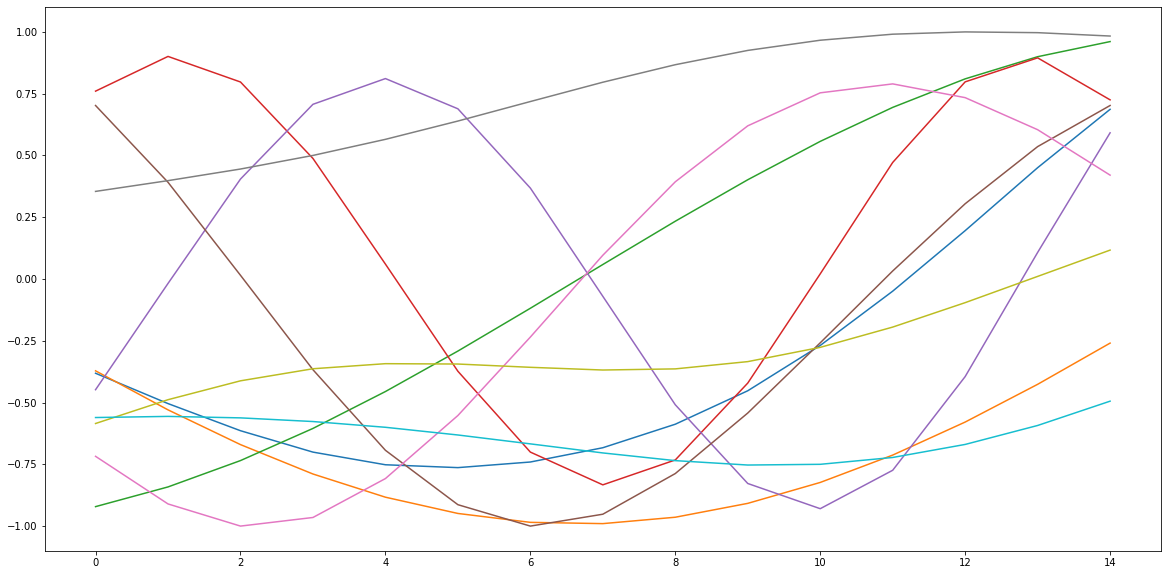

In [10]:
fig, ax = plt.subplots(1,1, figsize=[20,10])
#ax.plot(csv_data[100:115,:])
ax.plot(csv_data[0:15,:])
plt.show()

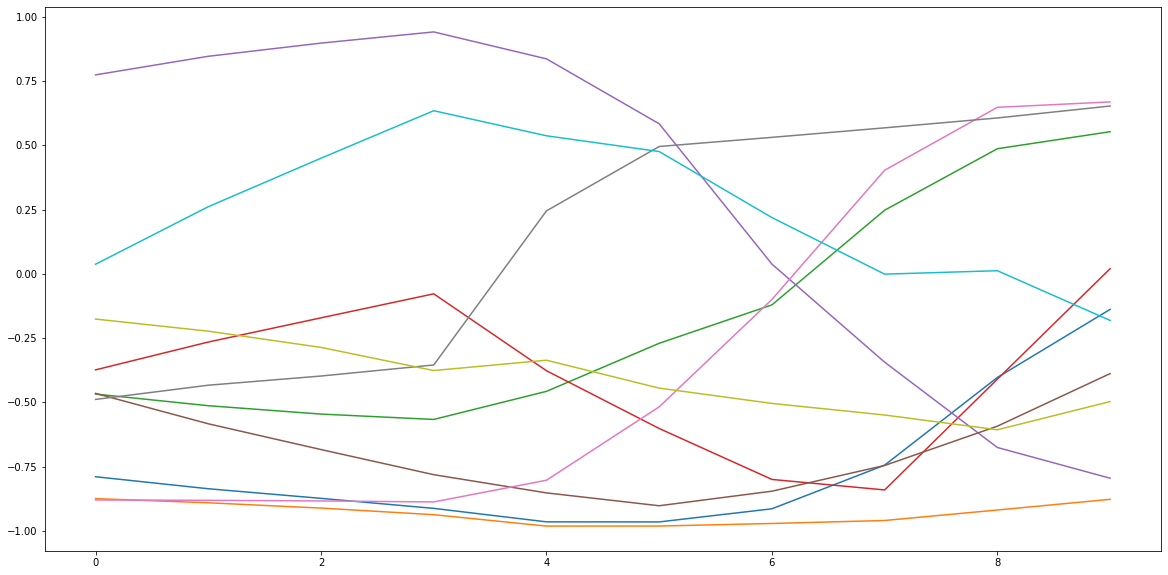

In [11]:
fig, ax = plt.subplots(1,1, figsize=[20,10])
ax.plot(flds[-10:,:])
plt.show()

In [12]:
training_data.shape

(200, 100)

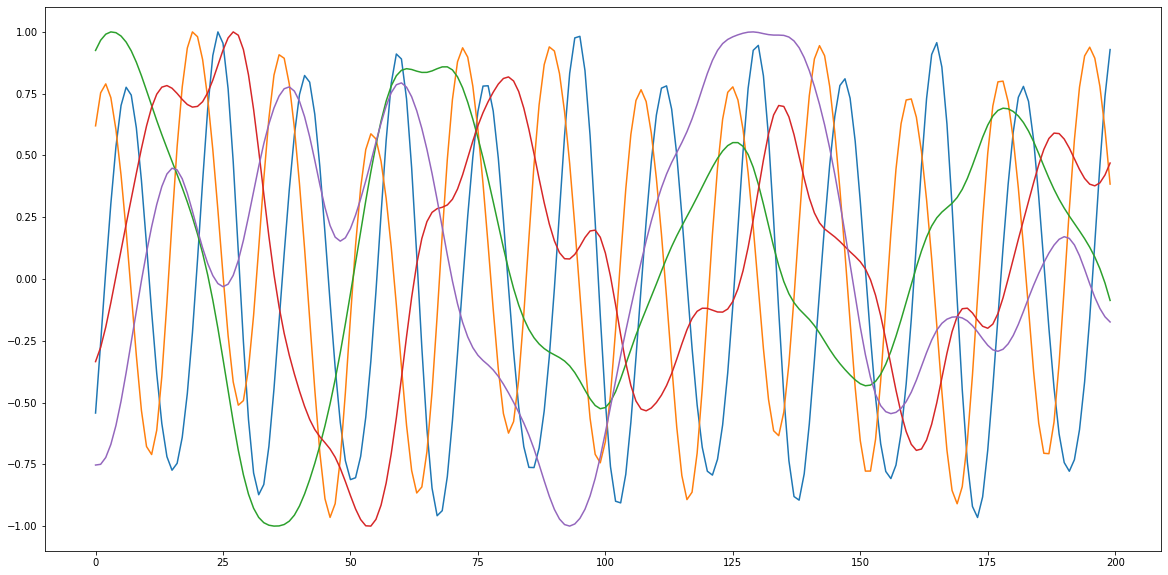

In [13]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

ax.plot(training_data[:, -5:])

In [14]:
basis = np.load('../data/processed/pod_basis_field_Velocity.npy')

In [15]:
def reconstruct(basis, eigenvalues, plot=True, images=4):
    n, m = eigenvalues.T.shape
    m = min([images, m])
    indexes = np.arange(n)
    
    fig, ax = plt.subplots(2,2, figsize=[20,10])
    

    for i in range(m):
        tmp_diag = np.zeros_like(basis)
        #tmp_diag[indexes, indexes] = scaling.inverse_transform([eigenvalues_tmp[:,i]])
        
        (tmp_diag.T @ basis).shape
        print(basis @ tmp_diag @ basis)
        im = ax.flatten()[i].imshow(basis @ tmp_diag @ basis)


        

In [16]:
eigenvalues_tmp = scaling.inverse_transform(training_data[1])
eigenvalues_tmp

ValueError: Expected 2D array, got 1D array instead:
array=[-0.5042114  -0.52962625 -0.8414944   0.90079206 -0.01794495  0.39139017
 -0.91035473  0.39805958 -0.48845166 -0.5560532  -0.6140137  -0.670209
 -0.73484486  0.79726845  0.40450922  0.01494652 -1.          0.44507486
 -0.412073   -0.562027   -0.70059204 -0.78919274 -0.6047581   0.48781404
  0.7070014  -0.36713853 -0.9651656   0.50008833 -0.36324218 -0.5768447
 -0.75180054 -0.88303185 -0.45543978  0.06030206  0.81117016 -0.69327
 -0.807677    0.5652032  -0.34268925 -0.6001323  -0.7633667  -0.94886464
 -0.29166234 -0.37336782  0.68882436 -0.9133857  -0.55248606  0.63925046
 -0.3441426  -0.6312902  -0.7406616  -0.98485714 -0.1184264  -0.7005257
  0.36798173 -1.         -0.23498803  0.7182168  -0.35739928 -0.66725963
 -0.68289185 -0.99001724  0.0586228  -0.8330728  -0.07008214 -0.9519316
  0.09612597  0.7963493  -0.36836267 -0.70393085 -0.5877075  -0.964147
  0.23379841 -0.7323104  -0.50902045 -0.78735405  0.39339668  0.8672631
 -0.36377135 -0.7350821  -0.45233154 -0.90801525  0.4016814  -0.42119396
 -0.82759297 -0.5424381   0.6198729   0.9250941  -0.33435538 -0.7529077
 -0.26898193 -0.8233797   0.5569486   0.02078373 -0.929577   -0.25829804
  0.7534474   0.9663375  -0.27664244 -0.74998015].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
training_data

In [ ]:
csv_data

In [ ]:
reconstruct(basis, csv_data)

In [ ]:
basis

In [ ]:
csv_data[:,1]

In [ ]:
tmp_diag = np.zeros_like(basis)
n, m = flds.shape
indexes = np.arange(n)
tmp_diag[indexes, indexes] = 1 
tmp_diag

In [ ]:
basis.shape

In [ ]:
csv_data.shape

In [ ]:
flds[:,0].shape

In [ ]:
basis